## In this task we compare different optimization techniques on CEC’2005 functions.

### This function implements a noisy version of Schwefel's Problem 1.2

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Step 1: Implement F4 Function
def noisy_schwefel(x):
    # Shift all input values (assuming the optimal point is at [1,1,...])
    shifted_val = x - np.ones_like(x)

    # Initialize our accumulator
    running_sum = 0

    # For each dimension, calculate the sum of all values up to and including
    # the current position, then square this value and add to our total
    for dimension in range(len(shifted_val)):
        # Take a slice of values and sum them
        partial_sum = np.sum(shifted_val[:dimension+1])

        # Square this sum and add to our running total
        running_sum += partial_sum**2

    # Add a small random noise to make the function stochastic
    # This noise follows a normal distribution with mean 0 and std dev 0.1
    noise_term = np.random.normal(0, 0.1)

    # Return the final result with noise added
    return running_sum + noise_term

In [3]:
# Step 2: Simulated Annealing Optimizer (basic)

def simulated_annealing(func, bounds, max_iter=1000, temp=1000, alpha=0.95):
    # Determine the dimensionality of our search space
    dim = len(bounds)

    # Initialize with a random position within our boundaries
    x = np.random.uniform([b[0] for b in bounds], [b[1] for b in bounds])

    # Evaluate our starting position
    fx = func(x)

    # Keep track of the best solution found so far
    best_x = x.copy()
    best_fx = fx

    # Store optimization progress
    history = [fx]

    # Main optimization loop
    for i in range(max_iter):
        # Generate a neighboring solution with Gaussian perturbation
        new_x = x + np.random.normal(0, 0.5, size=dim)

        # Ensure we stay within bounds
        new_x = np.clip(new_x, [b[0] for b in bounds], [b[1] for b in bounds])

        # Evaluate the new solution
        new_fx = func(new_x)

        # Calculate improvement (negative means better)
        delta = new_fx - fx

        # Calculate acceptance probability based on temperature
        prob = np.exp(-delta / temp)

        # Accept if better or probabilistically if worse
        if delta < 0 or np.random.rand() < prob:
            x, fx = new_x, new_fx

            # Update best solution if improved
            if fx < best_fx:
                best_x, best_fx = x, fx

        # Cool the temperature according to schedule
        temp *= alpha

        # Record best solution value
        history.append(best_fx)

    return best_x, best_fx, history

In [4]:
#  Step 3: Run 15 Experiments (D=2)

dim = 2      # Search in a 2D space

# Set our search boundaries to be a wide range from -100 to 100 in each dimension
bounds = [(-100, 100)] * dim  # Using the same bounds for both dimensions

# Lists to track our optimization results
results = []
histories = []

# Run multiple trials to account for randomness
for i in range(15):
   # Apply simulated annealing to find minimum of our noisy Schwefel function
   best_x, best_fx, history = simulated_annealing(noisy_schwefel, bounds)

   # Save the best function value found
   results.append(best_fx)

   # Track the convergence path for this run
   histories.append(history)

<ipython-input-3-7f8d5794e24d>:35: RuntimeWarning: overflow encountered in exp
  prob = np.exp(-delta / temp)


For all the summary stats needed in it.

Best: -0.2644528182292031
Worst: -0.10255729688703653
Mean: -0.20200229248310572
Std Dev: 0.04822355137552863


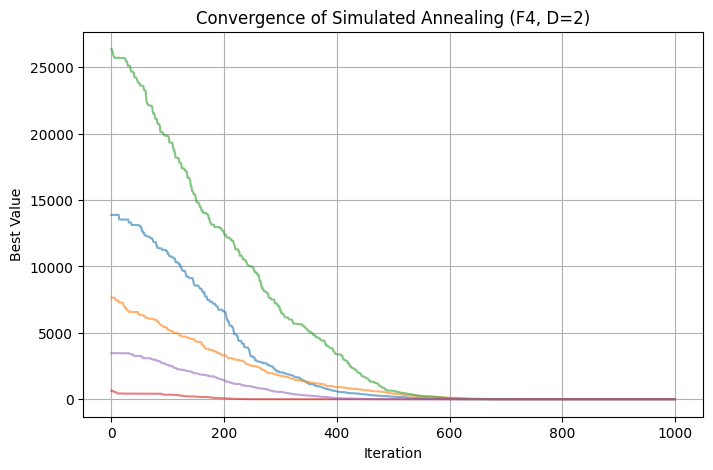

In [5]:
results = np.array(results)
print("Best:", np.min(results))
print("Worst:", np.max(results))
print("Mean:", np.mean(results))
print("Std Dev:", np.std(results))

# Plot convergence of a few runs
plt.figure(figsize=(8,5))
for h in histories[:5]:
    plt.plot(h, alpha=0.6)
plt.title("Convergence of Simulated Annealing (F4, D=2)")
plt.xlabel("Iteration")
plt.ylabel("Best Value")
plt.grid(True)
plt.show()

For D = 10


In [6]:
def simulated_annealing_new(func, bounds, max_iter=1000, temp=1000, alpha=0.95):
    dim = len(bounds)

    x = np.random.uniform([b[0] for b in bounds], [b[1] for b in bounds])
    # The line above was improperly indented. It should be at the same level as 'dim = len(bounds)'
    fx = func(x)

    best_x = x.copy()
    best_fx = fx

    history = [fx]

    for i in range(max_iter):
        new_x = x + np.random.normal(0, 2.0, size=dim)                # changed it to 2.0 from 0.5

        new_x = np.clip(new_x, [b[0] for b in bounds], [b[1] for b in bounds])

        # Evaluate the new solution
        new_fx = func(new_x)

        # Calculate improvement (negative means better)
        delta = new_fx - fx

        # Calculate acceptance probability based on temperature
        prob = np.exp(-delta / temp)

        # Accept if better or probabilistically if worse
        if delta < 0 or np.random.rand() < prob:
            x, fx = new_x, new_fx

            # Update best solution if improved
            if fx < best_fx:
                best_x, best_fx = x, fx

        # Cool the temperature according to schedule
        temp *= alpha
        alpha = 0.98

        history.append(best_fx)

    return best_x, best_fx, history

In [7]:
# For D=10


dim = 10      # Search in a 10D space

# Set our search boundaries to be a wide range from -100 to 100 in each dimension
bounds = [(-100, 100)] * dim  # Using the same bounds for both dimensions

# Lists to track our optimization results
results = []
histories = []

# Run multiple trials to account for randomness
for i in range(15):
   # Apply simulated annealing to find minimum of our noisy Schwefel function
   best_x, best_fx, history = simulated_annealing_new(noisy_schwefel, bounds, max_iter=2000)

   # Save the best function value found
   results.append(best_fx)

   # Track the convergence path for this run
   histories.append(history)

<ipython-input-6-1a93d812f79d>:25: RuntimeWarning: overflow encountered in exp
  prob = np.exp(-delta / temp)


Best: 6.730776057237434
Worst: 13.786673053060914
Mean: 10.765861646513088
Std Dev: 2.2215308352249368


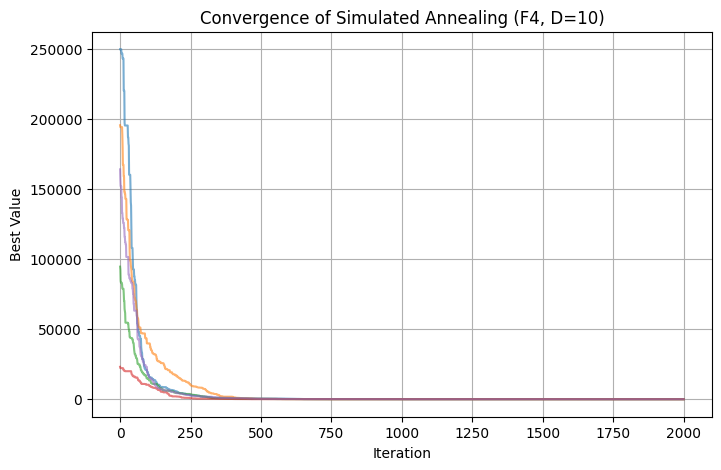

In [8]:
results = np.array(results)
print("Best:", np.min(results))
print("Worst:", np.max(results))
print("Mean:", np.mean(results))
print("Std Dev:", np.std(results))

# Plot convergence of a few runs
plt.figure(figsize=(8,5))
for h in histories[:5]:
    plt.plot(h, alpha=0.6)
plt.title("Convergence of Simulated Annealing (F4, D=10)")
plt.xlabel("Iteration")
plt.ylabel("Best Value")
plt.grid(True)
plt.show()

## F7 + Particle Swarm Optimization (PSO)

This Griewank function is a multimodel function, hence, it has lots of peaks and vallys. It makes it a good task for opttimization methods, and the meaning of "shifted rotation" means the landscape of it, makes it harder by rotating in open space.

In [9]:
# Step - 1, Shifted Rotated Griewank function
def griewank_shifted(x):
   # Shift the input vector by [1,1,...] to move the optimum away from origin
   z = x - np.ones_like(x)  # Simple shift vector

   # First term: Sum of squared components divided by 4000
   sum_sq = np.sum(z ** 2) / 4000

   # Second term: Product of cosines of each component divided by sqrt of its index
   # This creates oscillations in the landscape
   prod_cos = np.prod(np.cos(z / np.sqrt(np.arange(1, len(x) + 1))))

   # Combine terms with a constant offset of 1
   # The global minimum is 0 when x = [1,1,...] (before shifting)
   return sum_sq - prod_cos + 1

In [10]:
# Particle Swarm Optimization
def particle_swarm(func, bounds, num_particles=30, max_iter=500, w=0.5, c1=1.5, c2=1.5):
   """
   Particle Swarm Optimization algorithm for function minimization.

   Parameters:
   - func: Objective function to minimize
   - bounds: List of tuples defining (min, max) for each dimension
   - num_particles: Number of particles in the swarm
   - max_iter: Maximum number of iterations
   - w: Inertia weight - controls influence of previous velocity
   - c1: Cognitive parameter - controls attraction to personal best
   - c2: Social parameter - controls attraction to swarm's best
   """
   # Get problem dimensionality from bounds
   dim = len(bounds)

   # Initialize particle positions randomly within bounds
   positions = np.random.uniform([b[0] for b in bounds], [b[1] for b in bounds], (num_particles, dim))

   # Initialize particle velocities as zeros
   velocities = np.zeros_like(positions)

   # Initialize personal best positions to starting positions
   personal_best_pos = positions.copy()

   # Evaluate each particle's initial position
   personal_best_val = np.array([func(p) for p in positions])

   # Find the particle with best position in entire swarm
   global_best_idx = np.argmin(personal_best_val)
   global_best_pos = personal_best_pos[global_best_idx].copy()
   global_best_val = personal_best_val[global_best_idx]

   # Track the optimization progress
   history = [global_best_val]

   # Main PSO iteration loop
   for iter in range(max_iter):
       # Update each particle
       for i in range(num_particles):
           # Calculate new velocity using PSO update rule:
           # New velocity = inertia + cognitive component + social component
           velocities[i] = (
               w * velocities[i] +                                              # Inertia component
               c1 * np.random.rand(dim) * (personal_best_pos[i] - positions[i]) + # Cognitive component
               c2 * np.random.rand(dim) * (global_best_pos - positions[i])      # Social component
           )

           # Update particle position by adding velocity
           positions[i] += velocities[i]

           # Enforce boundary constraints
           positions[i] = np.clip(positions[i], [b[0] for b in bounds], [b[1] for b in bounds])

           # Evaluate new position
           current_val = func(positions[i])

           # Update personal best if current position is better
           if current_val < personal_best_val[i]:
               personal_best_val[i] = current_val
               personal_best_pos[i] = positions[i].copy()

       # Update global best if any personal best improved
       global_best_idx = np.argmin(personal_best_val)
       if personal_best_val[global_best_idx] < global_best_val:
           global_best_val = personal_best_val[global_best_idx]
           global_best_pos = personal_best_pos[global_best_idx].copy()

       # Record global best value for this iteration
       history.append(global_best_val)

   return global_best_pos, global_best_val, history


Best: 0.0
Worst: 0.019719489248184785
Mean: 0.004930693554258703
Std Dev: 0.005475414157446453


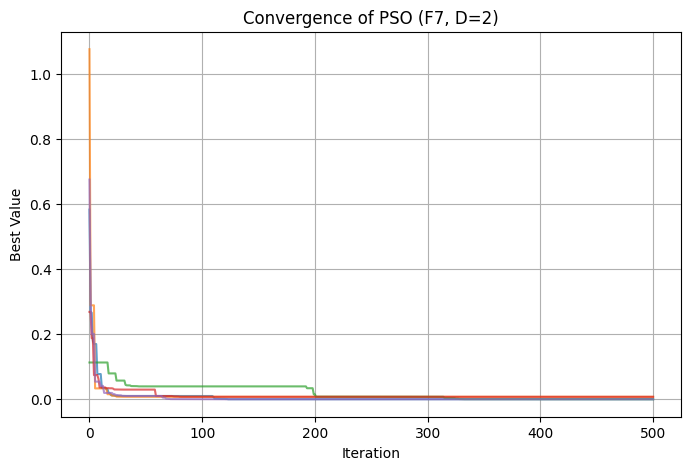

In [11]:
#  Step 3: Run Experiments for D = 2
# Set problem dimension to 2D
dim = 2

# Define search space boundaries: square area from -100 to 100 in each dimension
bounds = [(-100, 100)] * dim

# Initialize arrays to store optimization results
results = []
histories = []

# Run 15 independent trials to analyze algorithm performance
for _ in range(15):
   # Apply Particle Swarm Optimization to the shifted Griewank function
   best_x, best_fx, history = particle_swarm(griewank_shifted, bounds)

   # Store the best function value found in this trial
   results.append(best_fx)

   # Store the convergence history for this trial
   histories.append(history)

# Convert results to NumPy array for statistical analysis
results = np.array(results)

# Print performance statistics across all trials
print("Best:", results.min())      # Best solution found across all trials
print("Worst:", results.max())     # Worst solution found across all trials
print("Mean:", results.mean())     # Average performance
print("Std Dev:", results.std())   # Performance consistency measure

# Visualize convergence behavior for the first 5 trials
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))

# Plot each trial's convergence history with slight transparency
for h in histories[:5]:
   plt.plot(h, alpha=0.7)

# Add graph labels and formatting
plt.title("Convergence of PSO (F7, D=2)")
plt.xlabel("Iteration")
plt.ylabel("Best Value")
plt.grid(True)
plt.show()

Best: 0.014779776754825669
Worst: 0.21655084671488467
Mean: 0.10678586438738143
Std Dev: 0.05328996187403245


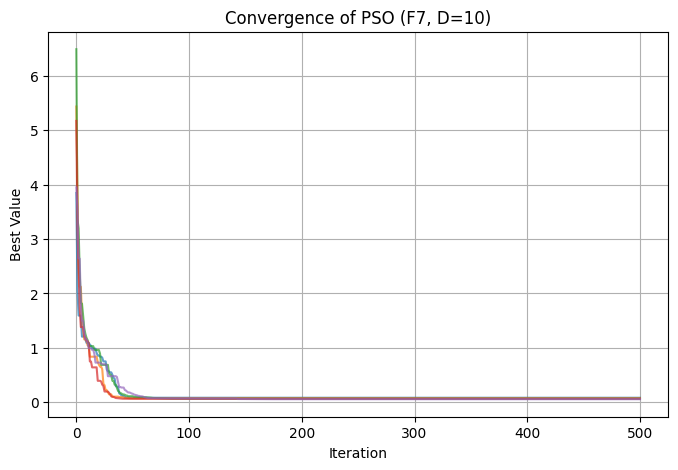

In [12]:
#  Step 4: Run Experiments for D = 10
# Set problem dimension to 10 D
dim = 10

bounds = [(-100, 100)] * dim
num_particles = 50
max_iter = 1000

# Initialize arrays to store optimization results
results = []
histories = []

# Run 15 independent trials to analyze algorithm performance
for _ in range(15):
   # Apply Particle Swarm Optimization to the shifted Griewank function
   best_x, best_fx, history = particle_swarm(griewank_shifted, bounds)

   # Store the best function value found in this trial
   results.append(best_fx)

   # Store the convergence history for this trial
   histories.append(history)

# Convert results to NumPy array for statistical analysis
results = np.array(results)

# Print performance statistics across all trials
print("Best:", results.min())      # Best solution found across all trials
print("Worst:", results.max())     # Worst solution found across all trials
print("Mean:", results.mean())     # Average performance
print("Std Dev:", results.std())   # Performance consistency measure

# Visualize convergence behavior for the first 5 trials
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))

# Plot each trial's convergence history with slight transparency
for h in histories[:5]:
   plt.plot(h, alpha=0.7)

# Add graph labels and formatting
plt.title("Convergence of PSO (F7, D=10)")
plt.xlabel("Iteration")
plt.ylabel("Best Value")
plt.grid(True)
plt.show()

## F18 + Artificial Bee Colony (ABC)

In [13]:
# Step 1: Define Simplified Hybrid Composition Function (F18)
# Simple hybrid composition function
def hybrid_composition(x):
   # Define shift vectors for each function component
   # These move the optima to different locations in the search space
   shifts = [np.ones_like(x)*1, np.ones_like(x)*(-1), np.zeros_like(x)]

   # Define three classic benchmark functions:

   # Sphere function - simple quadratic bowl with minimum at origin
   def sphere(z):
       return np.sum(z**2)

   # Rastrigin function - highly multimodal function with regular pattern
   # of local minima surrounding the global minimum
   def rastrigin(z):
       return 10*len(z) + np.sum(z**2 - 10*np.cos(2*np.pi*z))

   # Ackley function - has many local minima with a deep hole at the center
   def ackley(z):
       a, b, c = 20, 0.2, 2*np.pi
       return -a*np.exp(-b*np.sqrt(np.mean(z**2))) - np.exp(np.mean(np.cos(c*z))) + a + np.e

   # Weights determining contribution of each function to the hybrid
   # These sum to 1.0 to keep function scale reasonable
   weights = [0.3, 0.3, 0.4]

   # Calculate weighted sum of the three functions, each with different shift
   val = 0
   val += weights[0] * sphere(x - shifts[0])       # Sphere centered at [1,1,...]
   val += weights[1] * rastrigin(x - shifts[1])    # Rastrigin centered at [-1,-1,...]
   val += weights[2] * ackley(x - shifts[2])       # Ackley centered at origin

   return val

In [14]:
# Step 2: Humanized Artificial Bee Colony (ABC)
def artificial_bee_colony(func, bounds, num_bees=30, max_iter=500, limit=50):
   """
   Artificial Bee Colony optimization algorithm.

   This algorithm mimics the foraging behavior of honey bees, with three types of bees:
   employed bees (exploiting known food sources), onlooker bees (choosing sources based
   on quality), and scout bees (exploring for new sources).

   Parameters:
   - func: Objective function to minimize
   - bounds: List of (min, max) tuples for each dimension
   - num_bees: Number of food sources/employed bees
   - max_iter: Maximum number of iterations
   - limit: Maximum number of trials before abandoning a food source
   """
   # Get problem dimensionality
   dim = len(bounds)

   # Initialize food sources (potential solutions) randomly within boundaries
   food_sources = np.random.uniform([b[0] for b in bounds], [b[1] for b in bounds], (num_bees, dim))

   # Evaluate initial food sources
   fitness = np.array([func(source) for source in food_sources])

   # Initialize counters for tracking unsuccessful improvement attempts
   trial_counters = np.zeros(num_bees)

   # Track the best solution found so far
   best_idx = np.argmin(fitness)
   best_source = food_sources[best_idx].copy()
   best_fitness = fitness[best_idx]

   # Record optimization progress
   history = [best_fitness]

   # Main optimization loop
   for iteration in range(max_iter):

       # Employed Bees Phase
       # Each employed bee visits its assigned food source and searches nearby
       for i in range(num_bees):
           # Select a different food source to compare with
           neighbor = np.random.randint(num_bees)
           while neighbor == i:
               neighbor = np.random.randint(num_bees)

           # Generate new candidate solution by modifying one dimension
           phi = np.random.uniform(-1, 1, dim)  # Random influence factors
           new_source = food_sources[i] + phi * (food_sources[i] - food_sources[neighbor])

           # Ensure the new solution stays within bounds
           new_source = np.clip(new_source, [b[0] for b in bounds], [b[1] for b in bounds])
           new_fitness = func(new_source)

           # Greedy selection - keep better solution
           if new_fitness < fitness[i]:
               food_sources[i] = new_source
               fitness[i] = new_fitness
               trial_counters[i] = 0  # Reset abandonment counter
           else:
               trial_counters[i] += 1  # Increment abandonment counter

       #Onlooker Bees Phase
       # Calculate selection probabilities based on fitness quality
       # Better (lower) fitness values get higher probability
       prob = (1 / (1 + fitness)) / np.sum(1 / (1 + fitness))

       # Onlooker bees select food sources based on their quality
       for i in range(num_bees):
           # Probabilistic selection based on fitness
           if np.random.rand() < prob[i]:
               # Same neighborhood search as employed bees
               neighbor = np.random.randint(num_bees)
               while neighbor == i:
                   neighbor = np.random.randint(num_bees)

               phi = np.random.uniform(-1, 1, dim)
               new_source = food_sources[i] + phi * (food_sources[i] - food_sources[neighbor])
               new_source = np.clip(new_source, [b[0] for b in bounds], [b[1] for b in bounds])
               new_fitness = func(new_source)

               # Greedy selection
               if new_fitness < fitness[i]:
                   food_sources[i] = new_source
                   fitness[i] = new_fitness
                   trial_counters[i] = 0
               else:
                   trial_counters[i] += 1

       #Scout Bees Phase
       # Scouts replace food sources that haven't improved after many attempts
       for i in range(num_bees):
           if trial_counters[i] > limit:
               # Abandon current source and randomly explore a new one
               food_sources[i] = np.random.uniform([b[0] for b in bounds], [b[1] for b in bounds], dim)
               fitness[i] = func(food_sources[i])
               trial_counters[i] = 0  # Reset counter for new source

       # Update global best solution if improved
       current_best_idx = np.argmin(fitness)
       current_best_fitness = fitness[current_best_idx]
       if current_best_fitness < best_fitness:
           best_fitness = current_best_fitness
           best_source = food_sources[current_best_idx].copy()

       # Record best fitness for this iteration
       history.append(best_fitness)

   return best_source, best_fitness, history

Best: 1.2
Worst: 1.2
Mean: 1.1999999999999997
Std Dev: 2.220446049250313e-16


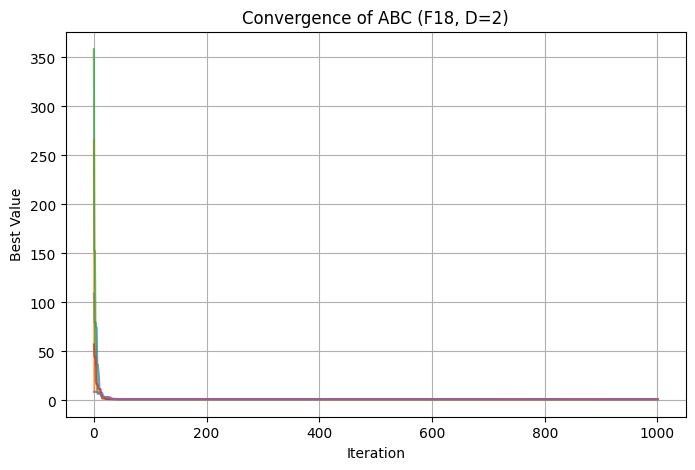

In [15]:
# Step 3: Running ABC on F18 (D=2)
# Set problem dimension to 2D
dim = 2

# Define search space: square region from -100 to 100 in each dimension
bounds = [(-100, 100)] * dim

# ABC algorithm parameters
num_bees = 50     # Number of bee agents (colony size)
max_iter = 1000   # Maximum number of iterations

# Initialize arrays to store results
results = []      # Final function values
histories = []    # Convergence histories

# Run 15 independent trials to assess algorithm consistency
for _ in range(15):
   # Apply Artificial Bee Colony algorithm to our hybrid composition benchmark
   best_x, best_fx, history = artificial_bee_colony(
       hybrid_composition, bounds, num_bees=num_bees, max_iter=max_iter
   )

   # Store the best solution value found
   results.append(best_fx)

   # Store the optimization trajectory
   histories.append(history)

# Convert results to NumPy array for statistical analysis
results = np.array(results)

# Calculate and display performance statistics
print("Best:", results.min())      # Best solution across all trials
print("Worst:", results.max())     # Worst solution across all trials
print("Mean:", results.mean())     # Average performance
print("Std Dev:", results.std())   # Measure of result consistency

# Create visualization of algorithm convergence
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))

# Plot first 5 runs to show convergence patterns
for h in histories[:5]:
   plt.plot(h, alpha=0.7)  # Alpha < 1 for better visibility when lines overlap

# Add graph labels and formatting
plt.title("Convergence of ABC (F18, D=2)")
plt.xlabel("Iteration")
plt.ylabel("Best Value")
plt.grid(True)
plt.show()

Best: 9.453545336832715
Worst: 15.469229176368945
Mean: 13.529691852472414
Std Dev: 1.4854903724964799


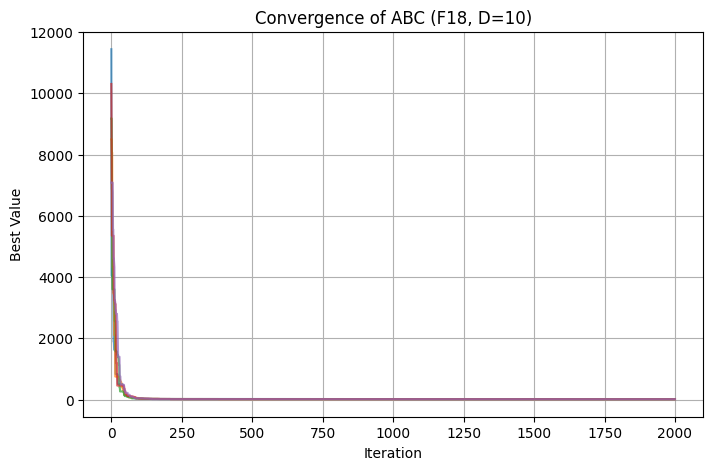

In [16]:
# Set problem dimension to 10 D
dim = 10

# Define search space: square region from -100 to 100 in each dimension
bounds = [(-100, 100)] * dim

# ABC algorithm parameters
num_bees = 50     # Number of bee agents (colony size)
max_iter = 2000   # Maximum number of iterations

# Initialize arrays to store results
results = []      # Final function values
histories = []    # Convergence histories

# Run 15 independent trials to assess algorithm consistency
for _ in range(15):
   # Apply Artificial Bee Colony algorithm to our hybrid composition benchmark
   best_x, best_fx, history = artificial_bee_colony(
       hybrid_composition, bounds, num_bees=num_bees, max_iter=max_iter
   )

   # Store the best solution value found
   results.append(best_fx)

   # Store the optimization trajectory
   histories.append(history)

# Convert results to NumPy array for statistical analysis
results = np.array(results)

# Calculate and display performance statistics
print("Best:", results.min())      # Best solution across all trials
print("Worst:", results.max())     # Worst solution across all trials
print("Mean:", results.mean())     # Average performance
print("Std Dev:", results.std())   # Measure of result consistency

# Create visualization of algorithm convergence
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))

# Plot first 5 runs to show convergence patterns
for h in histories[:5]:
   plt.plot(h, alpha=0.7)  # Alpha < 1 for better visibility when lines overlap

# Add graph labels and formatting
plt.title("Convergence of ABC (F18, D=10)")
plt.xlabel("Iteration")
plt.ylabel("Best Value")
plt.grid(True)
plt.show()